# Real Image with CNN

[data location](https://drive.google.com/file/d/1N1gcN8_5dZVlIejoC00QZLSZFhGoSoQb/view)

make sure to add a gitignore file (in cmd with: echo moin > .gitignore) and add there the relative path to the folder which should be ignored.
Big data shouldn't be in GitHub!

**check data installation**

In [1]:
import os

In [8]:
data_dir = 'D:\\Informatik\\Project-Lake\\Reinforcement Learning\\cell_images'

In [9]:
os.listdir(data_dir)

['test', 'train']

**read the data**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from matplotlib.image import imread

In [10]:
test_path = data_dir+'\\test\\'
train_path = data_dir+'\\train\\'

In [11]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [12]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [58]:
img_name = os.listdir(train_path+'\\parasitized')[0]
img_name

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [59]:
para_cell = train_path+'\\parasitized\\'+img_name
single_img_infected = imread(para_cell)

In [60]:
single_img_infected.shape

(148, 142, 3)

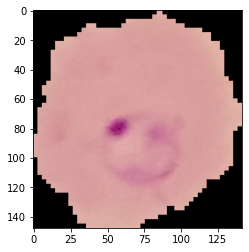

In [21]:
plt.imshow(single_img_infected)

In [22]:
img_name = os.listdir(train_path+'\\uninfected')[0]
img_name

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [23]:
uninfected_cell = train_path+'\\uninfected\\'+img_name
single_img_uninfected = imread(uninfected_cell)

In [24]:
single_img_uninfected.shape

(139, 160, 3)

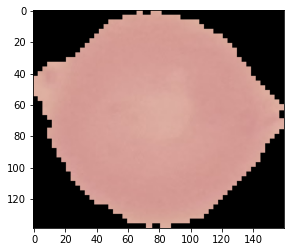

In [25]:
plt.imshow(single_img_uninfected)

In [26]:
pwd

'd:\\Informatik\\Project-Lake\\Reinforcement Learning\\05_cnn'

In [34]:
parasitized = len(os.listdir(train_path+'parasitized'))
uninfected = len(os.listdir(train_path+'uninfected'))
print(f"train({parasitized+uninfected}) = infected({parasitized}) + uninfected({uninfected})")

train(24960) = infected(12480) + uninfected(12480)


In [35]:
parasitized = len(os.listdir(test_path+'parasitized'))
uninfected = len(os.listdir(test_path+'uninfected'))
print(f"test({parasitized+uninfected}) = infected({parasitized}) + uninfected({uninfected})")

test(2600) = infected(1300) + uninfected(1300)


shape: (diffrent) -> resize by average size

In [40]:
dim1 = []
dim2 = []

for path in [train_path, test_path]:
    for group in ['uninfected', 'parasitized']:
        for image_filename in os.listdir(path+group):
            if image_filename.endswith('.png') or image_filename.endswith('.jpg'):
                img = imread(path+group+'\\'+image_filename)
                d1, d2, colors = img.shape
                dim1 += [d1]
                dim2 += [d2]

c:\Users\tobia\.conda\envs\ai\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


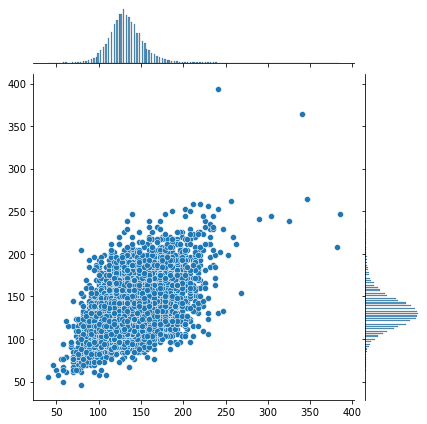

In [41]:
sns.jointplot(dim1, dim2)

In [43]:
np.mean(dim1)

132.9834530807751

In [45]:
np.mean(dim2)

132.48715436533857

=

In [46]:
image_shape = (130, 130, 3)

**data generation**

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [48]:
# help(ImageDataGenerator)

In [50]:
image_gen = ImageDataGenerator(rotation_range=20, 
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                #rescale=1/255
                                shear_range=0.1,
                                zoom_range=0.1,
                                horizontal_flip=True,
                                fill_mode='nearest')

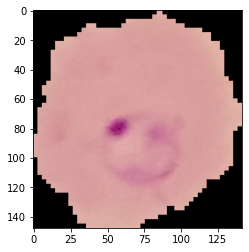

In [61]:
plt.imshow(single_img_infected)

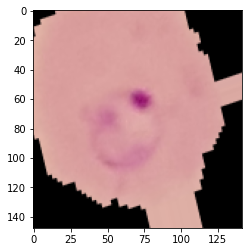

In [63]:
plt.imshow(image_gen.random_transform(single_img_infected))

In [64]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [65]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


now we could generate more data...

**model creation**

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, Activation

In [69]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

#model.add(Dense(128, activation='relu'))
# or same:
model.add(Dense(128))
model.add(Activation(activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation(activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

**fit model**

In [72]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

In [74]:
# power of 2
batch_size = 16

In [75]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], color_mode='rgb', 
                                                                batch_size=batch_size, class_mode='binary')

Found 24958 images belonging to 2 classes.


In [76]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode='rgb', 
                                                                batch_size=batch_size, class_mode='binary',
                                                                shuffle=False)

Found 2600 images belonging to 2 classes.


In [77]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

hint: long duration: simply load the trained model

In [79]:
results = model.fit_generator(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/20


<ipython-input-79-8a64ed8535cd>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])


  71/1560 [>.............................] - ETA: 3:25 - loss: 0.7045 - accuracy: 0.5282

KeyboardInterrupt: 

In [80]:
from tensorflow.keras.models import load_model

In [81]:
model = load_model('../COURSE_NOTEBOOKS/04-CNNs/malaria_detector.h5')

In [83]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
# don't work:
# model.history.history

**evaluation**

In [87]:
model.metrics_names

['loss', 'accuracy']

In [84]:
model.evaluate_generator(test_image_gen)

<ipython-input-84-31acfd80dad9>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_image_gen)


[36.74124526977539, 0.875]

In [88]:
pred = model.predict_generator(test_image_gen)

<ipython-input-88-19492c89b657>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(test_image_gen)


In [91]:
predictions = pred > 0.5
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [93]:
from sklearn.metrics import confusion_matrix, classification_report

In [94]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [95]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1300
           1       0.97      0.77      0.86      1300

    accuracy                           0.88      2600
   macro avg       0.89      0.88      0.87      2600
weighted avg       0.89      0.88      0.87      2600



In [97]:
cm = confusion_matrix(test_image_gen.classes, predictions)
cm

array([[1273,   27],
       [ 298, 1002]], dtype=int64)

<AxesSubplot:>

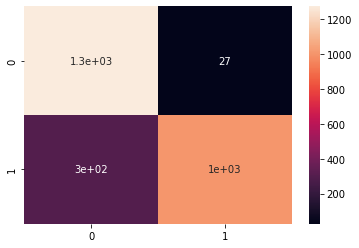

In [98]:
sns.heatmap(cm, annot=True)

cool is, that the result is a percentage -> we can set the threshold by 90 % or other value!

**predict a new image**

In [99]:
from tensorflow.keras.preprocessing import image

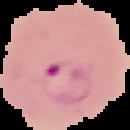

In [102]:
my_image = image.load_img(para_cell, target_size=image_shape)
my_image

In [106]:
my_image_arr = image.img_to_array(my_image)

In [107]:
my_image_arr.shape

(130, 130, 3)

In [108]:
my_image_arr = np.expand_dims(my_image_arr, axis=0)

In [109]:
my_image_arr.shape

(1, 130, 130, 3)

In [110]:
model.predict(my_image_arr)

1/1 [==============================] - 0s 59ms/step


array([[0.]], dtype=float32)

In [111]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}